In [1]:
!pip install mediapipe opencv-python pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import mediapipe as mp
import cv2

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [7]:
cap = cv2.VideoCapture(r"C:\Users\Natanya Modi\Downloads\exercises\pushups\4945123-uhd_4096_2160_24fps.mp4")
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read() 
            if not ret:
                print("Ignoring empty frame.")
                break

            frame = cv2.resize(frame, (640, 480))
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = pose.process(image)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            if results.pose_landmarks:
                mp_drawing.draw_landmarks(
                    image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                )

            cv2.imshow("video", image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

In [9]:
results.pose_landmarks.landmark[0]

x: 0.3343017101287842
y: 0.6249972581863403
z: -0.21519222855567932
visibility: 0.9997648000717163

In [11]:
import csv
import os
import numpy as np

In [13]:
num_coords = len(results.pose_landmarks.landmark)
num_coords

33

In [23]:
landmarks =  ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [17]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [25]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [27]:
exercises_folder = r"C:\Users\Natanya Modi\Downloads\exercises"

# Define the classes (subfolder names)
classes = ['pushups', 'lunges', 'jumping_jacks', 'bicep_curl', 'squats']

for class_name in classes:
    class_folder = os.path.join(exercises_folder, class_name)
    print(f"Processing class: {class_name}...")
    
    # Get all video files in the class folder
    video_files = [f for f in os.listdir(class_folder) if f.endswith(('.mp4', '.avi', '.mov'))]
    
    for video_file in video_files:
        video_path = os.path.join(class_folder, video_file)
        print(f"  Processing video: {video_file}")
        
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"    Error: Could not open video {video_path}")
            continue
            
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            frame_count = 0
            while cap.isOpened():
                ret, frame = cap.read() 
                if not ret:
                    break  # End of video

                # Process every 5th frame to reduce data size (adjust as needed)
                frame_count += 1
                if frame_count % 5 != 0:
                    continue

                frame = cv2.resize(frame, (640, 480))
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False

                results = pose.process(image)

                if results.pose_landmarks:
                    # Extract Pose landmarks
                    pose_landmarks = results.pose_landmarks.landmark
                    pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] 
                                             for landmark in pose_landmarks]).flatten())
                    
                    # Add class name at the beginning
                    row = [class_name] + pose_row
                    
                    # Append to CSV
                    with open('coords.csv', mode='a', newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow(row)

        cap.release()
        print(f"    Completed: {video_file}")
    
    print(f"Finished processing class: {class_name}\n")

print("Data collection complete!")

Processing class: pushups...
  Processing video: 4804794-uhd_3840_2160_25fps.mp4
    Completed: 4804794-uhd_3840_2160_25fps.mp4
  Processing video: 4945123-uhd_4096_2160_24fps.mp4
    Completed: 4945123-uhd_4096_2160_24fps.mp4
  Processing video: 5195148-hd_1920_1080_30fps.mp4
    Completed: 5195148-hd_1920_1080_30fps.mp4
  Processing video: pushups.mp4
    Completed: pushups.mp4
Finished processing class: pushups

Processing class: lunges...
  Processing video: 13265259_1920_1080_25fps.mp4
    Completed: 13265259_1920_1080_25fps.mp4
  Processing video: 5025761-hd_1080_1920_25fps.mp4
    Completed: 5025761-hd_1080_1920_25fps.mp4
  Processing video: 6326756-hd_1080_1920_25fps.mp4
    Completed: 6326756-hd_1080_1920_25fps.mp4
  Processing video: lunges.mp4
    Completed: lunges.mp4
Finished processing class: lunges

Processing class: jumping_jacks...
  Processing video: 3048952-uhd_3840_2160_24fps.mp4
    Completed: 3048952-uhd_3840_2160_24fps.mp4
  Processing video: 5025960-hd_1080_1920

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('coords.csv')
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,pushups,0.604195,0.431936,-0.912359,0.999745,0.610695,0.406979,-0.900846,0.999322,0.613498,...,0.977323,0.304280,0.405842,0.703244,1.049377,0.441873,0.307218,0.721064,0.884713,0.649388
1,pushups,0.604325,0.431710,-0.861921,0.999580,0.610922,0.406769,-0.849948,0.998972,0.613694,...,0.874815,0.305680,0.380623,0.699411,0.976743,0.430675,0.305574,0.716815,0.788919,0.643749
2,pushups,0.607100,0.428960,-0.865162,0.999225,0.612952,0.404170,-0.853524,0.998217,0.615500,...,0.896875,0.303881,0.375659,0.696595,0.988272,0.421632,0.305797,0.713769,0.808524,0.636135
3,pushups,0.616784,0.456000,-0.789412,0.999130,0.623586,0.431089,-0.779186,0.998054,0.626216,...,0.803426,0.301223,0.381787,0.707439,0.907781,0.412831,0.307024,0.716316,0.725662,0.624882
4,pushups,0.623712,0.554374,-0.819542,0.999106,0.629935,0.529293,-0.807744,0.997919,0.632887,...,0.877802,0.310319,0.384432,0.697082,1.051934,0.402054,0.304452,0.699648,0.776080,0.616067


In [30]:
df[df['class'] == 'pushups'] 

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,pushups,0.604195,0.431936,-0.912359,0.999745,0.610695,0.406979,-0.900846,0.999322,0.613498,...,0.977323,0.304280,0.405842,0.703244,1.049377,0.441873,0.307218,0.721064,0.884713,0.649388
1,pushups,0.604325,0.431710,-0.861921,0.999580,0.610922,0.406769,-0.849948,0.998972,0.613694,...,0.874815,0.305680,0.380623,0.699411,0.976743,0.430675,0.305574,0.716815,0.788919,0.643749
2,pushups,0.607100,0.428960,-0.865162,0.999225,0.612952,0.404170,-0.853524,0.998217,0.615500,...,0.896875,0.303881,0.375659,0.696595,0.988272,0.421632,0.305797,0.713769,0.808524,0.636135
3,pushups,0.616784,0.456000,-0.789412,0.999130,0.623586,0.431089,-0.779186,0.998054,0.626216,...,0.803426,0.301223,0.381787,0.707439,0.907781,0.412831,0.307024,0.716316,0.725662,0.624882
4,pushups,0.623712,0.554374,-0.819542,0.999106,0.629935,0.529293,-0.807744,0.997919,0.632887,...,0.877802,0.310319,0.384432,0.697082,1.051934,0.402054,0.304452,0.699648,0.776080,0.616067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,pushups,0.743297,0.508970,-0.558600,0.999807,0.748521,0.473534,-0.546319,0.999585,0.749705,...,0.640052,0.831662,0.280873,0.549568,0.888032,0.564297,0.206170,0.565138,0.604625,0.928127
383,pushups,0.751094,0.628624,-0.504348,0.999806,0.758339,0.604140,-0.493029,0.999580,0.758758,...,0.607939,0.844530,0.279660,0.543024,0.845286,0.562441,0.198998,0.565313,0.565352,0.931971
384,pushups,0.754749,0.626529,-0.444298,0.999800,0.762042,0.603006,-0.437783,0.999573,0.762338,...,0.631050,0.853544,0.265303,0.534087,0.858595,0.564733,0.200046,0.565292,0.583404,0.934104
385,pushups,0.757751,0.542042,-0.463157,0.999811,0.765021,0.513430,-0.451662,0.999601,0.765560,...,0.608047,0.856402,0.253689,0.534625,0.798809,0.572843,0.206595,0.563665,0.588837,0.934669


In [32]:
X = df.drop('class', axis=1)
y = df['class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
y_test

852     jumping_jacks
184           pushups
1261           squats
67            pushups
220           pushups
            ...      
323           pushups
855     jumping_jacks
1112       bicep_curl
704     jumping_jacks
135           pushups
Name: class, Length: 443, dtype: object

In [48]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [58]:
from time import time
from tqdm import tqdm
pipelines = {
    'lr': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, verbose=1)),
    'rc': make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(verbose=1)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(verbose=1)),
}

In [60]:
fit_models = {}
print("Starting model training...")

for algo, pipeline in tqdm(pipelines.items(), desc="Overall Progress"):
    print(f"\nTraining {algo}...")
    start_time = time()
    
    # Get the model name for display
    model_name = str(pipeline.steps[-1][1].__class__.__name__)
    
    try:
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model
    except Exception as e:
        print(f"Error training {algo}: {str(e)}")
        continue
    
    end_time = time()
    print(f"Completed {model_name} in {end_time - start_time:.2f} seconds")

print("\nAll models trained successfully!")

Starting model training...


Overall Progress:  25%|████████████████▌                                                 | 1/4 [00:00<00:00,  7.28it/s]


Training lr...
Completed LogisticRegression in 0.14 seconds

Training rc...
Completed RidgeClassifier in 0.04 seconds

Training rf...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
Overall Progress:  75%|█████████████████████████████████████████████████▌                | 3/4 [00:02<00:00,  1.21it/s]

Completed RandomForestClassifier in 2.09 seconds

Training gb...
      Iter       Train Loss   Remaining Time 
         1           1.2505            1.17m
         2           1.0172            1.24m
         3           0.8444            1.23m
         4           0.7068            1.24m
         5           0.6003            1.22m
         6           0.5062            1.21m
         7           0.4274            1.21m
         8           0.3639            1.20m
         9           0.3119            1.19m
        10           0.2660            1.17m
        20           0.0602            1.04m
        30           0.0148           54.94s
        40           0.0038           46.54s
        50           0.0010           38.79s
        60           0.0003           31.12s
        70           0.0001           23.39s
        80           0.0000           15.63s
        90           0.0000            7.84s


Overall Progress: 100%|██████████████████████████████████████████████████████████████████| 4/4 [01:20<00:00, 20.06s/it]

       100           0.0000            0.00s
Completed GradientBoostingClassifier in 77.97 seconds

All models trained successfully!


In [62]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(max_iter=1000, verbose=1))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier(verbose=1))]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(verbose=1))])}

In [78]:
fit_models['rf'].predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array(['jumping_jacks', 'pushups', 'squats', 'pushups', 'pushups',
       'lunges', 'lunges', 'pushups', 'pushups', 'pushups', 'lunges',
       'jumping_jacks', 'lunges', 'pushups', 'squats', 'bicep_curl',
       'jumping_jacks', 'jumping_jacks', 'pushups', 'bicep_curl',
       'pushups', 'lunges', 'lunges', 'pushups', 'squats', 'bicep_curl',
       'jumping_jacks', 'lunges', 'bicep_curl', 'pushups', 'squats',
       'bicep_curl', 'lunges', 'lunges', 'jumping_jacks', 'jumping_jacks',
       'squats', 'jumping_jacks', 'pushups', 'squats', 'pushups',
       'bicep_curl', 'jumping_jacks', 'squats', 'pushups', 'pushups',
       'bicep_curl', 'lunges', 'lunges', 'jumping_jacks', 'lunges',
       'pushups', 'pushups', 'bicep_curl', 'lunges', 'jumping_jacks',
       'pushups', 'bicep_curl', 'lunges', 'bicep_curl', 'squats',
       'jumping_jacks', 'bicep_curl', 'lunges', 'squats', 'pushups',
       'pushups', 'bicep_curl', 'pushups', 'bicep_curl', 'squats',
       'pushups', 'lunges', 'pushup

In [80]:
from sklearn.metrics import accuracy_score
import pickle

In [82]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9864559819413092
rc 0.9887133182844243
rf 0.9977426636568849
gb 0.9841986455981941


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [84]:
fit_models['rf'].predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array(['jumping_jacks', 'pushups', 'squats', 'pushups', 'pushups',
       'lunges', 'lunges', 'pushups', 'pushups', 'pushups', 'lunges',
       'jumping_jacks', 'lunges', 'pushups', 'squats', 'bicep_curl',
       'jumping_jacks', 'jumping_jacks', 'pushups', 'bicep_curl',
       'pushups', 'lunges', 'lunges', 'pushups', 'squats', 'bicep_curl',
       'jumping_jacks', 'lunges', 'bicep_curl', 'pushups', 'squats',
       'bicep_curl', 'lunges', 'lunges', 'jumping_jacks', 'jumping_jacks',
       'squats', 'jumping_jacks', 'pushups', 'squats', 'pushups',
       'bicep_curl', 'jumping_jacks', 'squats', 'pushups', 'pushups',
       'bicep_curl', 'lunges', 'lunges', 'jumping_jacks', 'lunges',
       'pushups', 'pushups', 'bicep_curl', 'lunges', 'jumping_jacks',
       'pushups', 'bicep_curl', 'lunges', 'bicep_curl', 'squats',
       'jumping_jacks', 'bicep_curl', 'lunges', 'squats', 'pushups',
       'pushups', 'bicep_curl', 'pushups', 'bicep_curl', 'squats',
       'pushups', 'lunges', 'pushup

In [86]:
y_test

852     jumping_jacks
184           pushups
1261           squats
67            pushups
220           pushups
            ...      
323           pushups
855     jumping_jacks
1112       bicep_curl
704     jumping_jacks
135           pushups
Name: class, Length: 443, dtype: object

In [90]:
with open('exercises.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [101]:
with open('exercises.pkl', 'rb') as f:
    model = pickle.load(f)

In [103]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier(verbose=1))])

In [121]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
from collections import deque

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Video path
video_path = r"C:\Users\Natanya Modi\Downloads\test4.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video {video_path}")
    exit()

# Settings
CONFIDENCE_THRESHOLD = 0.5  # Only show predictions with >50% confidence
HISTORY_SIZE = 10  # Number of frames to consider for majority voting

# Initialize prediction history
prediction_history = deque(maxlen=HISTORY_SIZE)
current_exercise = None

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read() 
        if not ret:
            break  # End of video

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.pose_landmarks:
            # Draw landmarks
            mp_drawing.draw_landmarks(
                image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
            )

            # Extract Pose landmarks
            pose_landmarks = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] 
                                  for landmark in pose_landmarks]).flatten())
            
            # Predict exercise
            X = pd.DataFrame([pose_row])
            exercise_prob = model.predict_proba(X)[0]
            max_prob = np.max(exercise_prob)
            
            if max_prob > CONFIDENCE_THRESHOLD:
                exercise_class = model.predict(X)[0]
                prediction_history.append(exercise_class)
                
                # Get most common recent prediction
                if prediction_history:
                    current_exercise = max(set(prediction_history), key=prediction_history.count)
            
            # Display the most confident recent prediction
            if current_exercise:
                cv2.putText(image, f"Exercise: {current_exercise}", (20, 50), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.putText(image, f"Confidence: {max_prob:.0%}", (20, 90), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.imshow("Exercise Classification", image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
C:\ProgramData\anaconda3\Lib\site-pa

In [139]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


In [141]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )

In [149]:
video_path = r"C:\Users\Natanya Modi\Downloads\test3.mp4"
cap = cv2.VideoCapture(video_path)
# Set mediapipe model 
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, pose)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

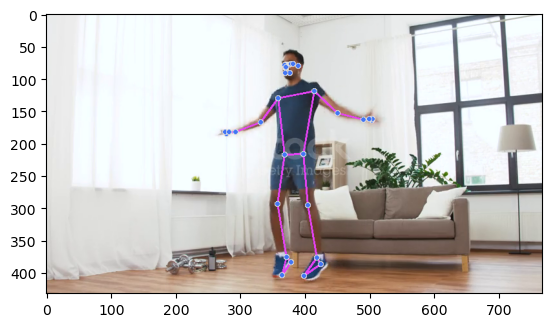

In [155]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [161]:
print(len(results.pose_landmarks.landmark))

33


In [167]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
pose

array([ 4.84311193e-01,  1.97627068e-01, -1.27034754e-01,  9.99975860e-01,
        4.90504950e-01,  1.83124825e-01, -1.14666849e-01,  9.99949515e-01,
        4.94450092e-01,  1.82548732e-01, -1.14758529e-01,  9.99948025e-01,
        4.98150110e-01,  1.82162628e-01, -1.14836134e-01,  9.99949753e-01,
        4.83781725e-01,  1.84878439e-01, -1.06538899e-01,  9.99942124e-01,
        4.82550263e-01,  1.85403749e-01, -1.06520168e-01,  9.99924183e-01,
        4.81038243e-01,  1.85843930e-01, -1.06439985e-01,  9.99932051e-01,
        5.07860124e-01,  1.89622745e-01, -3.41952667e-02,  9.99944866e-01,
        4.84259844e-01,  1.92835882e-01,  5.26844198e-03,  9.99872923e-01,
        4.91679907e-01,  2.13476390e-01, -9.67315957e-02,  9.99925613e-01,
        4.82712179e-01,  2.14086428e-01, -8.52102414e-02,  9.99913573e-01,
        5.40375173e-01,  2.79279202e-01,  6.48211874e-03,  9.99883533e-01,
        4.67497826e-01,  3.04050475e-01,  8.39893818e-02,  9.99739587e-01,
        5.87985337e-01,  

In [169]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    return pose

In [171]:
res_test = extract_keypoints(results)
res_test

array([ 4.84311193e-01,  1.97627068e-01, -1.27034754e-01,  9.99975860e-01,
        4.90504950e-01,  1.83124825e-01, -1.14666849e-01,  9.99949515e-01,
        4.94450092e-01,  1.82548732e-01, -1.14758529e-01,  9.99948025e-01,
        4.98150110e-01,  1.82162628e-01, -1.14836134e-01,  9.99949753e-01,
        4.83781725e-01,  1.84878439e-01, -1.06538899e-01,  9.99942124e-01,
        4.82550263e-01,  1.85403749e-01, -1.06520168e-01,  9.99924183e-01,
        4.81038243e-01,  1.85843930e-01, -1.06439985e-01,  9.99932051e-01,
        5.07860124e-01,  1.89622745e-01, -3.41952667e-02,  9.99944866e-01,
        4.84259844e-01,  1.92835882e-01,  5.26844198e-03,  9.99872923e-01,
        4.91679907e-01,  2.13476390e-01, -9.67315957e-02,  9.99925613e-01,
        4.82712179e-01,  2.14086428e-01, -8.52102414e-02,  9.99913573e-01,
        5.40375173e-01,  2.79279202e-01,  6.48211874e-03,  9.99883533e-01,
        4.67497826e-01,  3.04050475e-01,  8.39893818e-02,  9.99739587e-01,
        5.87985337e-01,  

In [191]:
DATA_PATH = r"C:\Users\Natanya Modi\Downloads\new_exercises"
actions = np.array(['lunges', 'squats', 'pushups', 'jumping_jacks', 'bicep_curl'])
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [193]:
for action in actions: 
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [195]:
VIDEO_PATH = r"C:\Users\Natanya Modi\Downloads\exercises"
DATA_PATH = r"C:\Users\Natanya Modi\Downloads\new_exercises"

sequence_length = 30
start_folder = 30

actions = os.listdir(VIDEO_PATH)  # Automatically pick up all folders like pushups, squats, etc.
actions = [a for a in actions if os.path.isdir(os.path.join(VIDEO_PATH, a))]


In [197]:
def extract_keypoints(results):
    if results.pose_landmarks:
        return np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in results.pose_landmarks.landmark]).flatten()
    else:
        return np.zeros(33 * 4)

In [201]:
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    for action in actions:
        action_dir = os.path.join(VIDEO_PATH, action)
        video_files = [f for f in os.listdir(action_dir) if f.endswith(('.mp4', '.avi', '.mov'))]
    
        for idx, video_file in enumerate(video_files):
            video_path = os.path.join(action_dir, video_file)
            cap = cv2.VideoCapture(video_path)
    
            seq_index = start_folder + idx
            save_dir = os.path.join(DATA_PATH, action, str(seq_index))
            os.makedirs(save_dir, exist_ok=True)
    
            frame_count = 0
            while cap.isOpened() and frame_count < sequence_length:
                ret, frame = cap.read()
                if not ret:
                    break
    
                # Detect pose
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                results = pose.process(image)
    
                keypoints = extract_keypoints(results)
                np.save(os.path.join(save_dir, f"{frame_count}.npy"), keypoints)
    
                frame_count += 1
    
            cap.release()
            print(f"Saved: {action} | Video {idx} | Frames: {frame_count}")
    
    pose.close()
    cv2.destroyAllWindows()

Saved: bicep_curl | Video 0 | Frames: 30
Saved: bicep_curl | Video 1 | Frames: 30
Saved: bicep_curl | Video 2 | Frames: 30
Saved: bicep_curl | Video 3 | Frames: 30
Saved: jumping_jacks | Video 0 | Frames: 30
Saved: jumping_jacks | Video 1 | Frames: 30
Saved: jumping_jacks | Video 2 | Frames: 30
Saved: jumping_jacks | Video 3 | Frames: 30
Saved: lunges | Video 0 | Frames: 30
Saved: lunges | Video 1 | Frames: 30
Saved: lunges | Video 2 | Frames: 30
Saved: lunges | Video 3 | Frames: 30
Saved: pushups | Video 0 | Frames: 30
Saved: pushups | Video 1 | Frames: 30
Saved: pushups | Video 2 | Frames: 30
Saved: pushups | Video 3 | Frames: 30
Saved: squats | Video 0 | Frames: 30
Saved: squats | Video 1 | Frames: 30
Saved: squats | Video 2 | Frames: 30
Saved: squats | Video 3 | Frames: 30


ValueError: Closing SolutionBase._graph which is already None

In [205]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [207]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'bicep_curl': 0, 'jumping_jacks': 1, 'lunges': 2, 'pushups': 3, 'squats': 4}

In [209]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [211]:
np.array(labels).shape

(20,)

In [217]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [255]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [257]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)